Unversity of Michigan ROB 101 - Computational Linear Algebra

# Homework 5.  Linear independence, Least Squares and Regression

## Using an LU factorization to determine whether a matrix has independent columns.
<img src = "https://i.postimg.cc/nLw6wQ5V/LUlindep.jpg" width = 700>

### Example: $$A = \begin{bmatrix} 1&0&2\\2&-2&6\\3&4&2\\1&5&-3\end{bmatrix} $$

In [4]:
##Forward and Back substitution functions from HW04

#This is a back substitution function.  It solves for x in an equation Ux = b, where U is upper triangular.
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )./U[i,i]
    end
    return x
end
#This is a forward substitution function
function forwardsub(L, b)
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
    end
    return x
end

forwardsub (generic function with 1 method)

In [2]:
#Example:
using LinearAlgebra
#declaring the A matrix:
A = [1 0 2; 2 -2 6; 3 4 2; 1 5 -3] 
#Running an LU decomposition
(L, U, P) = lu(A)
U #Show U in the Output

3×3 Matrix{Float64}:
 3.0   4.0      2.0
 0.0  -4.66667  4.66667
 0.0   0.0      8.88178e-16

Notice that the [3, 3] entry of U is very close to zero.  Due to the way that computers store numbers, sometimes zero gets stored as a very very small floating point value instead.  We need to step through the matrix U and change any number that should be zero, to actually be zero.

In [5]:
(rows, cols) = size(U)
for i in rows
    for j in cols
        if isapprox(U[i,j], 0, atol = 1E-10) #if there is a value within 1E-10 of zero
            U[i, j] = 0 #replace it with zero
        end
    end
end
print(U)
#check to make sure that zero replaced what we wanted
#If a vector alpha exists that satisfies A*alpha = 0 and U*alpha = 0
b = zeros(size(U, 1), 1)
alpha = backwardsub(U, b)
#if at least one entry of alpha is non-zero, then the columns of A are linearly dependendent
#if alpha is the zero vector, the columns are linearly independent

#NaN is a non-zero answer that typically occurs when the computer divides 0/0

[3.0 4.0 2.0; 0.0 -4.666666666666666 4.666666666666667; 0.0 0.0 0.0]

3-element Vector{Float64}:
 NaN
 NaN
 NaN

### Problem 1. Build a function that returns True if the columns of A are Independent and False if they are Dependent
Use the example above to help you.  Remember to replace the near-zero values with zero.

Hint:  In computer science, True and False are the [boolean](https://en.wikipedia.org/wiki/Boolean_data_type) values 1 and 0, respectively.

In [6]:
function is_independent(A)
    #Correct the zeros, find alpha, then assess the values to determine if the vectors are independent
    ### BEGIN SOLUTION
    U = lu(A).U
    (rows, cols) = size(A)
    for i in 1:rows
        for j in 1:cols
            if isapprox(U[i,j], 0, atol = 1E-10) #if there is a value within 1E-10 of zero
                U[i, j] = 0 #replace it with zero
            end
        end
    end
    b = zeros(size(U, 1), 1)
    alpha = backwardsub(U, b)
    println(alpha)
    if sum(alpha) == 0
        return 1
    else
        return 0
    end
    ### END SOLUTION
end

is_independent (generic function with 1 method)

In [7]:
is_independent(A)

LoadError: BoundsError: attempt to access 3×3 Matrix{Float64} at index [4, 1]

In [ ]:
aInd = [7   2   1   2   9;1   10   6   8   2;1   10   5   10   7;8   6   8   2   3;8   4   5   5   10]
is_independent(aInd)

In [ ]:
aIndep = [3 2 6 0; 0 6 7 2; 0 0 8 1]
is_independent(aIndep)

### Problem 2.  Existence and Uniqueness of Solutions.
<img src = "https://i.postimg.cc/FKB7QLxC/vector-Lin-Indeps.jpg" width = 700>


### a) Using the method described above, determine whether or not $Ax = b$ has a solution given 

$$\begin{equation}
\label{eq:LinearCombinationViaLU}
\underbrace{\left[\begin{array}{rrr}
 1 & -2 &  1 \\
 2 &  0 & 0 \\
 3 &  -3 &  1 \\
 4 &  1 &  0 \\
 5 &  -4 &  1
 \end{array}\right]}_{A} \underbrace{\left[\begin{array}{c}
x_1\\ x_2\\x_3 \end{array}\right]}_{x} =  \underbrace{\left[\begin{array}{r}
9\\ 4\\ 16 \\5 \\ 23 \end{array}\right]}_{b}.
\end{equation}$$

In [ ]:
A = [1 -2 1; 2 0 0; 3 -3 1; 4 1 0; 5 -4 1]
b = [9; 4; 16; 5; 23]
#Declare U and U_bar from L-U factorizations of [A] and [A b]
### BEGIN SOLUTION
luA = lu(A)
luAb = lu([A b])
U = luA.U
U_bar = luAb.U
### END SOLUTION

<img src = "https://i.postimg.cc/J4vJjSXd/linear-Combo.jpg" width = 700>

In [ ]:
#Count how many non-zero elements are on the diagonals of U and U_bar
function countDiag(M)
    #Initialize a count variable, then update it as you test each column vector for dependence
    ### BEGIN SOLUTION
    count = size(M, 2) 
    for i in size(M, 2)
        if isapprox(M[i, i], 0, atol = 1E-9) 
            print("got one")
            @show count = count - 1
        end
    end
    ### END SOLUTION
    
    return count
end

In [ ]:
#Check 
@show countU = countDiag(U)
@show countU_bar = countDiag(U_bar)

### b) Based on your results, does a solution to $Ax = b$ exist?  Explain your answer.
### BEGIN SOLUTION
student writing here
### END SOLUTION

### c.  Now that we know a solution exists, is it unique?
$$ A = \begin{bmatrix} 1 & -2 &  1 \\2 &  0 & 0 \\3 &  -3 &  1 \\4 &  1 &  0 \\5 &  -4 &  1\end{bmatrix} $$

Hint:  If the columns of A are linearly independent, the solution is unique.

In [ ]:
A = [1 -2 1; 2 0 0; 3 -3 1; 4 1 0; 5 -4 1]
#Use code from problem 1 to determine if the columns are independent
### BEGIN SOLUTION
is_independent(A)
### END SOLUTION

#the solution is unique:  (true/false)

### Problem 3.  The Norm of a Vector
<img src = "https://i.postimg.cc/ZnngJ7zk/normDef.jpg" width = 700>

### a)  Calculate the Norm of vector v1 $$v1 = \begin{bmatrix}-1\\4\\7\\3\\6\\2\end{bmatrix}$$

Hint:  Use the definition above, taken from the ROB 101 booklet.

In [ ]:
#vector v1 is declared for you
v1 = [-1; 4; 7; 3; 6; 2]
#store the norm into a variable called normv1
### BEGIN SOLUTION
normv1 = sqrt(v1[1]^2 + v1[2]^2 + v1[3]^2 + v1[4]^2 + v1[5]^2 + v1[6]^2)
### END SOLUTION

In [ ]:
### BEGIN HIDDEN TESTS
using LinearAlgebra
@assert normv1 == norm(v1)
### END HIDDEN TESTS

### b.  Given a vector of an unknown length, write a function that calculates the norm of the vector

In [ ]:
#Fill in the necessary elements of the function
function my_norm(v)
    #initializing a sum variable to be zero
    sumSquares = 0
    #write a For loop that adds up the squares of all the elements of v
    ### BEGIN SOLUTION
    for i in 1:length(v)
        sumSquares = sumSquares + v[i]^2
    end
    ### END SOLUTION
    #Now take the root of the sum of all the squares, and return the value from the function
    ### BEGIN SOLUTION
    return sqrt(sumSquares)
    ### END SOLUTION
end

In [ ]:
#check that your function returns the same value as you got earlier for normv1
my_norm(v1) == normv1
### BEGIN HIDDEN TESTS
vTest = randn(100, 1)
@assert isapprox(my_norm(vTest), norm(vTest))
### END HIDDEN TESTS

**The secret:  Julia has a Built-in Norm function in the linear algebra package, called norm().  You can use it the exact same way as your my-norm() function.**

Note:  You still must complete the function my_norm() as indicated to receive points.  This is not because we want you to do unnecessary busy work, it is because we think it is important that you understand what Julia is doing behind the scenes when you use an included function.

### Problem 4. Least Squares Solutions to linear equations
<img src = "https://i.postimg.cc/7hMvLBKm/LSQ.jpg" width = 700>

### a)  Find a least squares solution to $Ax = b$, given
$$\begin{equation}
\label{eq:LeastSquareSolExample}
\underbrace{\left[\begin{array}{rrr}
 1.0 & 1.0 \\
 2.0 & 1.0 \\
 4.0 & 1.0 \\
 5.0 & 1.0 \\
 7.0  & 1.0
 \end{array}\right]}_{A} \underbrace{\left[\begin{array}{c}
x_1 \\ x_2  \end{array}\right]}_{x} =  \underbrace{\left[\begin{array}{r}
4 \\  8 \\ 10 \\ 12 \\ 18 \end{array}\right]}_{b},
\end{equation}$$
A reminder about LU with permutations for solving $Ax = b$:
<img src= "https://i.postimg.cc/D0NFCzXc/LU-P.jpg" width = 700>

In [ ]:
#Declare A and b
### BEGIN SOLUTION
A = [1. 1. ; 2 1; 4 1; 5 1; 7 1]
b = [4; 8; 10; 12; 18]
### END SOLUTION

In [ ]:
#Compute A' * A and store in a variable aTransA
### BEGIN SOLUTION
aTransA = A' * A
### END SOLUTION

In [ ]:
#Compute A' * b and store in a variable aTransB
### BEGIN SOLUTION
aTransB = A' * b
### END SOLUTION

In [ ]:
#Compute x by solving    aTransA * x = aTransB
#store x in a variable called xStar

#use an LU factorization with permutations, and the forwardsub() and backwardsub() functions provided
### BEGIN SOLUTION
F = lu(aTransA)
P = F.P
L= F.L
U = F.U
pb = P * aTransB
y = forwardsub(L, pb)
xStar = backwardsub(U, y)
### END SOLUTION 

#Hint:  Make sure you are solving A' * A x = A' b

### b.  Compute the error and determine if we found an exact solution
Remember, e* = Ax* - b

In [ ]:
#Compute e* and store in a variable eStar
### BEGIN SOLUTION
eStar = A*xStar - b
### END SOLUTION

In [ ]:
#Compute ||e*|| and store in variable normE
### BEGIN SOLUTION
normE = norm(eStar)
### END SOLUTION

In [ ]:
#Compute ||e*||^2 and store in variable normEsquared
### BEGIN SOLUTION
normEsquared = normE^2
### END SOLUTION

### c.  Does this system have an exact solution?  Explain why or why not.

### BEGIN SOLUTION
student writing here.  No exact solution.
### END SOLUTION

### Problem 5.  Linear fitting with Least Squares
Recall that a linear regression can be written as the linear equations:
$$y_i = m x_i +b = \begin{bmatrix} x_i & 1 \end{bmatrix} \begin{bmatrix} m \\ b \end{bmatrix},  ~~1 \le i \le N,$$ 
Where N is the number of data points.

In Matrix Form:
$$\begin{equation}
    \label{eq:FirstRegressionModel02}
\underbrace{\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\y_N \end{bmatrix}}_{Y} = \underbrace{\left[\begin{array}{cc}
    x_1 & 1 \\
    x_2  & 1 \\
    \vdots & 1 \\
    x_N & 1
\end{array}  \right]}_{\Phi} \cdot  \underbrace{\begin{bmatrix} m \\ b \end{bmatrix}}_{\alpha},
\end{equation}$$
Where $Y$ is the vector of $y$-data, $\Phi$ is called the regressor matrix and $\alpha$ is the vector of unknown coefficients that parameterize the  model.

In [ ]:
#This cell generates the data
noise = randn(300, 1)
xvals = collect(0:.1:29.9)
yvals = 1/2*xvals + noise
using Plots
scatter(xvals, yvals)

### a)  Create the Y and $\Phi$ Matrices for the data.
Look back at the problem 5 cell for help identifying which data goes in which matrix.

In [ ]:
#Declare Y and Phi below
### BEGIN SOLUTION
Y = yvals
oneCol = ones(length(xvals), 1)
Phi = [xvals oneCol]
### END SOLUTION

### b) Find the least squares solution to $Y =  \Phi  \alpha $  
Hint:  Follow the steps you followed in Problem 4, except we have $\Phi$ instead of $A$, $\alpha$ instead of $x$, and $Y$ instead of $b$

In [ ]:
#compute alpha* and return it in a variable called alpha
### BEGIN SOLUTION
F = lu(Phi' * Phi)
P = F.P
L= F.L
U = F.U
pY = P * (Phi' * Y)
y = forwardsub(L, pY)
alphaStar = backwardsub(U, y)
### END SOLUTION

### c)  Plot the least squares solution on the same plot as the scatter.  
Reminder: $\alpha = \begin{bmatrix} m \\ b \end{bmatrix}$ and $Y = mx + b$

In [ ]:
#Plot the regression solution on the same plot.  Hint: Use plot!()
### BEGIN SOLUTION
m = alphaStar[1]
b = alphaStar[2]
x = collect(0:.1:29.9)
y = m*x + b*ones(length(x), 1)
plot!(x, y)
### END SOLUTION

#hint:  if you are getting a MethodError: no method matching +(::Array{Float64,1}, ::Float64),
#check that you are not trying to add a scalar to an array.  

### d)  Compute the total squared error
$$E_{tot} = \sum_{i=1}^{5} (e_i)^2 = e^\top e = ||e||^2= ||Y-\Phi \alpha ||^2.$$
Use this equation to give an objective measure of how accurate your linear fit was.

In [ ]:
#Use whatever method you would like, but store the value in a variable totSquareError
### BEGIN SOLUTION
totSquareError = norm(Y-Phi*alpha)^2
### END SOLUTION

### Problem 6.  Quadratic Fitting
You can also fit a regression to a non-linear set of data.  It is still a "linear regression" even if the data itself is not a linear pattern.

Writing out the quadratic regression equation $y_i = c_0 + c_1 x_i + c_2 x_i^2$ $,i=1,\cdots,N$ in matrix form yields

$$\underbrace{\left[ \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N \end{array} \right]}_{Y} =
 \underbrace{\left[ \begin{array}{ccc} 1 & x_1 & (x_1)^2 \\ 1 & x_2 & (x_2)^2 \\ \vdots & \vdots \\ 1 & x_N & (x_N)^2 \end{array} \right]}_{\Phi}
 \underbrace{\left[ \begin{array}{c} c_0 \\ c_1 \\ c_2 \end{array} \right] }_{\alpha},
$$

In [ ]:
#This cell generates the data
using Distributions
using Plots
f(x) = 3*x+2*x.^2 
N=300
x=rand(Uniform(-2,2),300,1)
x=sort(x,dims = 1)
noise=rand(Uniform(-0.5,0.5),300,1)
ydata=f(x) + noise
scatter(x,ydata)

### a)  Create the $Y$ and $\Phi$ Matrices 

In [ ]:
#Declare your matrices below
### BEGIN SOLUTION
phi = [ones(length(x), 1) x x.^2]
Y = ydata
### END SOLUTION

### b) Find the least squares solution to $Y =  \Phi  \alpha $ 
Hint:  Follow the steps you followed in Problem 4 to use the LU factorization, except we have $\Phi$ instead of $A$, $\alpha$ instead of $x$, and $Y$ instead of $b$

In [ ]:
#compute alpha* and return it in a variable called alpha
### BEGIN SOLUTION
F = lu(phi' * phi)
P = F.P
L= F.L
U = F.U
pY = P * (phi' * Y)
y = forwardsub(L, pY)
alphaStar = backwardsub(U, y)
### END SOLUTION

### c)  Plot the least squares regression on the same plot as the scatter
Remember: $ \alpha = \left[ \begin{array}{c} c_0 \\ c_1 \\ c_2 \end{array} \right]$, and the fit is $y_i = c_0 + c_1 x_i + c_2 x_i^2$

In [ ]:
#Declare y_fit and plot it on the same graph with plot!()
### BEGIN SOLUTION
c0 = alphaStar[1]
c1 = alphaStar[2]
c2 = alphaStar[3]
yfit = c0*ones(length(x), 1) + c1*x + c2*x.^2
plot!(x, yfit)
### END SOLUTION

### d)  Compute the total squared error

In [ ]:
#Use whatever method you would like, but store the value in a variable totSquareError
### BEGIN SOLUTION
totSquareError = norm(y-phi*alpha)^2
### END SOLUTION

### Problem 7.  Multi-Term Regression.
Basically, any dataset can have a regression of any degree fit to it.  Some fits will be better than others, and often, the best way to find out which degree is the most accurate is to test out a bunch of different fits.  For a problem with a degree higher than a quadratic, it is more efficient to automate the process.  

### a) Write a function to handle a regression fit of any desired degree. 

Your function should:
* take in a vector of x data, a vector of y data, and the degree of the function (and the scatterplot for display reasons)
* declare $\Phi$ and $Y$
* Solve for $\alpha$
* declare the fitted function 
* plot the fitted function on top of the scatter plot
* return the total squared error

Hint:  Make use of For loops within the function!  

In [6]:
function multi_term_regression(xdata, ydata, degree, p)
    #fill in the rest of the function.  Look back at problem 6 for help.
    ### BEGIN SOLUTION
    Y = ydata
    phi = Array{Float64}(undef, length(xdata), degree + 1)
    phi[:,1] = ones(size(phi, 1), 1)
    for i in 2:size(phi, 2)
        phi[:, i] = xdata.^(i-1)
    end
     
    #calculating alpha
    F = lu(phi' * phi)
    P = F.P
    L= F.L
    U = F.U
    pY = P * (phi' * Y)
    y = forwardsub(L, pY)
    alph = backwardsub(U, y)
    
    yfit = Vector{Float64}(undef, length(xdata))
    for i in 1:length(alph)
        yfit = yfit + alph[i]*xdata.^(i-1)
    end
    plot!(xdata, yfit)
    totSquareError = norm(Y-phi*alph)^2
    return totSquareError
    ### END SOLUTION
    
end

multi_term_regression (generic function with 1 method)

sdata = rand(Uniform(-4, 4), 300, 1) = [-3.428402475799629; -1.6524827738357697; -3.9457133505272726; 1.4082421022197718; -3.821732947039745; 2.794442525322573; 0.28186907282038653; 2.269958961582896; -2.287515014475103; -1.9382696731306321; -1.6394163807728894; 3.777287543792829; -1.6025654509979912; 3.382262408567195; 2.593112832694798; -0.5570711160656536; -3.6946436802945684; 0.23898965280416284; -0.1502430834116577; -2.3846168736181053; 3.5153715162136567; 0.8561736209010036; 3.8270555428366233; -0.36315446109924565; 1.796409166797682; -0.9903303533418537; -0.028346123623343544; -1.0741179710523454; -1.8583189204357886; 2.706707091183766; -3.8021683133805677; -1.716225200737025; -1.995665694009089; -3.0260089023651897; -3.7049274644249905; -3.5003752148280967; -3.882305379243773; 1.8713788524745585; -0.6799359389676436; -1.8142851624795; -1.8731185086801148; 0.39897987052909833; -0.6172580870654656; -3.998352831880778; 2.166122500424999; -0.8680573076855627; 1.4398169914399066; 3.

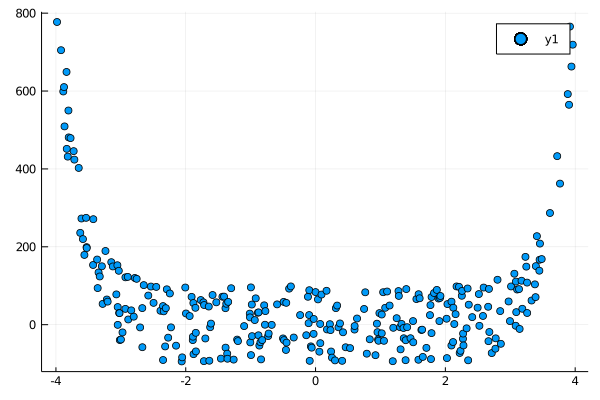

In [15]:
using Random
using Distributions
using LinearAlgebra
using Plots
#getting the data ready
g(xdata) = 0.03xdata + 0.02xdata.^2 - 0.05xdata.^3 + 0.0007xdata.^5 + 0.0008xdata.^10
@show sdata = rand(Uniform(-4, 4), 300, 1)
@show xdata = sort(xdata, dims = 1)
noise = rand(Uniform(-100, 100), 300, 1)
ydata = g(xdata) + noise
p = scatter(xdata, ydata)

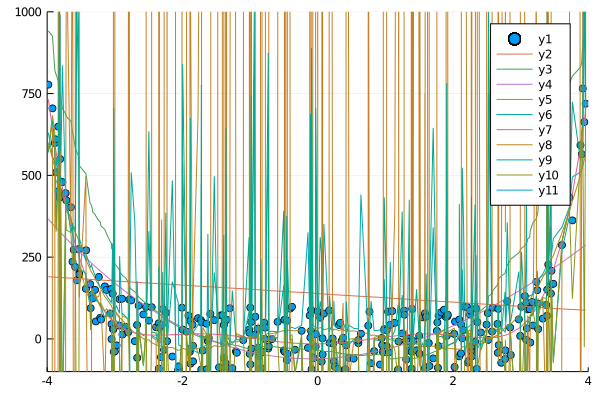

In [16]:
oneTerm = multi_term_regression(xdata, ydata, 1, p)
twoTerm = multi_term_regression(xdata, ydata, 2, p)
threeTerm = multi_term_regression(xdata, ydata, 3, p)
fourTerm =  multi_term_regression(xdata, ydata, 4, p)
fiveTerm = multi_term_regression(xdata, ydata, 5, p )
sixTerm =  multi_term_regression(xdata, ydata, 6, p)
sevenTerm =  multi_term_regression(xdata, ydata, 7, p)
eightTerm = multi_term_regression(xdata, ydata, 8, p)
nineTerm = multi_term_regression(xdata, ydata, 9, p)
tenTerm = multi_term_regression(xdata, ydata, 10, p)
xlims!(-4, 4)
ylims!(-100, 1000)

### b)  Use the total squared error values to determine which fit is the most accurate
Hint:  The variables oneTerm, twoTerm, etc contain the least squared error for their fit.  

Hint 2:  The julia function argmin() will return the index of the minimum, and minimim() will return the actual minimum value in an array.

In [ ]:
#Find the minimum total error by comparing all of the fits from 1 to 10 terms
#Store the number of terms in the best fitting equation as bestFit
#Store the total squared error of that best fitting equation as bestFitError
### BEGIN SOLUTION
errorsTerm = [oneTerm, twoTerm, threeTerm, fourTerm, fiveTerm, sixTerm, sevenTerm, eightTerm, nineTerm, tenTerm]
bestFitError = minimum(errorsTerm)
bestFit = argmin(errorsTerm)
### END SOLUTION

### Which fit was the best?  Explain why.
### BEGIN SOLUTION
student writing here
### END SOLUTION